In [2]:
from os import path
from spindle_tracker.io.trackmate import trackmate_peak_import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def dist(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)
def get_outside_spots(x_base, y_base, xs, ys, radius):
    spots_outside_xs = list()
    spots_outside_ys = list()
    for i in range(0,len(xs)):
        if dist(x_base, y_base,xs[i],ys[i]) > radius:
            spots_outside_xs.append(xs[i])
            spots_outside_ys.append(ys[i])
    return spots_outside_xs,spots_outside_ys
def change_label(df, index, value):
    for j in df.loc[index]:
        df.set_value(index,"phase", value)

In [8]:
cellNb = "60"
spotsPath = "/media/sophie/Sophie/20170404/1804_2/X0_Y0_MITOSIS/spots/"+cellNb+"_GFP.xml"
if path.lexists(spotsPath):
    gfpSpots = trackmate_peak_import(spotsPath, False)

    

labels_gfp = ["interphase"]*len(gfpSpots)

gfpSpots["phase"] = labels_gfp
meta_color = "r"
ana_color = "b"
radius = 0.3
an = np.linspace(0, 2*np.pi, 100)
circle_xs = radius *np.cos(an)
circle_ys = radius *np.sin(an)

for x in gfpSpots.index.levels[0]:
    if x in cfpSpots.index and x in gfpSpots.index:
        current_frame_poles = cfpSpots.loc[x]
        current_frame_kts = gfpSpots.loc[x]
        if len(current_frame_poles)>1:
            alpha = 0.5
            fig,ax = plt.subplots(figsize=(5,5))
            ax.axis('equal')
            ax.plot(circle_xs + current_frame_poles['x'].iloc[0], circle_ys + current_frame_poles['y'].iloc[0], "y--",alpha = alpha)
            ax.plot(circle_xs + current_frame_poles['x'].iloc[1], circle_ys + current_frame_poles['y'].iloc[1], "y--",alpha = alpha)
            spots_outside = (list(current_frame_kts['x']), list(current_frame_kts['y']))
            for i in range(0,len(current_frame_poles['x'])):
                spots_outside = get_outside_spots(current_frame_poles['x'].iloc[i], current_frame_poles['y'].iloc[i],
                                                  spots_outside[0],spots_outside[1],radius)
            if len(spots_outside[0])==0:
                ax.scatter(current_frame_poles['x'],current_frame_poles['y'],alpha = alpha, c= ana_color)
                ax.scatter(current_frame_kts['x'],current_frame_kts['y'],alpha = alpha, c= "g")
                change_label(cfpSpots,x,"anaphase")
                change_label(gfpSpots,x,"anaphase")
            else:
                ax.scatter(current_frame_poles['x'],current_frame_poles['y'],alpha = alpha, c= meta_color)
                ax.scatter(current_frame_kts['x'],current_frame_kts['y'],alpha = alpha, c= "g")
                change_label(cfpSpots,x,"metaphase")
                change_label(gfpSpots,x,"metaphase")
#             alpha += 0.9/len(gfpSpots.index.levels[0])
            plt.title(x)
            plt.show()

AttributeError: 'NoneType' object has no attribute 'find'

In [3]:
cellNb = "52"
spotsPath = "E:/Temperature_102/25C/102/102_25C_1/X0_Y0_MITOSIS/spots/"+cellNb+"_GFP.xml"
if path.lexists(spotsPath):
    gfpSpots = trackmate_peak_import(spotsPath, False)
spotsPath = "E:/Temperature_102/25C/102/102_25C_1/X0_Y0_MITOSIS/spots/"+cellNb+"_CFP.xml"
if path.lexists(spotsPath):
    cfpSpots = trackmate_peak_import(spotsPath, False)
    

In [49]:
labels_cfp = ["interphase"]*len(cfpSpots)
labels_gfp = ["interphase"]*len(gfpSpots)
cfpSpots["phase"] = labels_cfp
gfpSpots["phase"] = labels_gfp
meta_color = "r"
ana_color = "b"
radius = 0.3
an = np.linspace(0, 2*np.pi, 100)
circle_xs = radius *np.cos(an)
circle_ys = radius *np.sin(an)

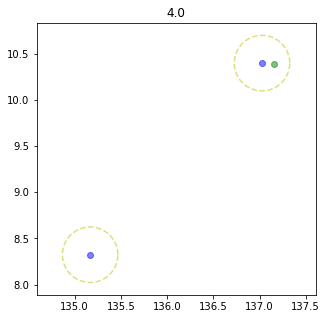

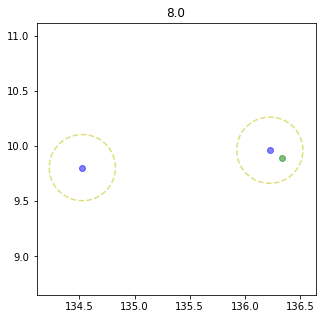

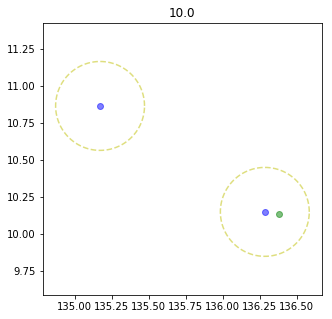

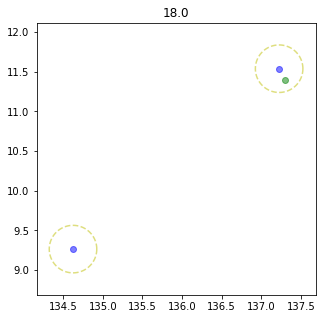

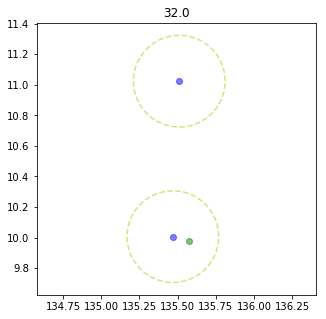

In [50]:

for x in gfpSpots.index.levels[0]:
    if x in cfpSpots.index and x in gfpSpots.index:
        current_frame_poles = cfpSpots.loc[x]
        current_frame_kts = gfpSpots.loc[x]
        if len(current_frame_poles)>1:
            alpha = 0.5
            fig,ax = plt.subplots(figsize=(5,5))
            ax.axis('equal')
            ax.plot(circle_xs + current_frame_poles['x'].iloc[0], circle_ys + current_frame_poles['y'].iloc[0], "y--",alpha = alpha)
            ax.plot(circle_xs + current_frame_poles['x'].iloc[1], circle_ys + current_frame_poles['y'].iloc[1], "y--",alpha = alpha)
            spots_outside = (list(current_frame_kts['x']), list(current_frame_kts['y']))
            for i in range(0,len(current_frame_poles['x'])):
                spots_outside = get_outside_spots(current_frame_poles['x'].iloc[i], current_frame_poles['y'].iloc[i],
                                                  spots_outside[0],spots_outside[1],radius)
            if len(spots_outside[0])==0:
                ax.scatter(current_frame_poles['x'],current_frame_poles['y'],alpha = alpha, c= ana_color)
                ax.scatter(current_frame_kts['x'],current_frame_kts['y'],alpha = alpha, c= "g")
                change_label(cfpSpots,x,"anaphase")
                change_label(gfpSpots,x,"anaphase")
            else:
                ax.scatter(current_frame_poles['x'],current_frame_poles['y'],alpha = alpha, c= meta_color)
                ax.scatter(current_frame_kts['x'],current_frame_kts['y'],alpha = alpha, c= "g")
                change_label(cfpSpots,x,"metaphase")
                change_label(gfpSpots,x,"metaphase")
#             alpha += 0.9/len(gfpSpots.index.levels[0])
            plt.title(x)
            plt.show()

In [44]:
cfpSpots.to_csv("E:/Temperature_102/25C/102/102_25C_2/X0_Y0_MITOSIS/Nouveau dossier/"+cellNb+"_CFP_anot_spots.csv")
gfpSpots.to_csv("E:/Temperature_102/25C/102/102_25C_2/X0_Y0_MITOSIS/Nouveau dossier/"+cellNb+"_GFP_anot_spots.csv")

In [45]:
cfpSpots

t          x          y    z  mean_intensity         w  \
t_stamp label                                                             
0.0     0      0.0  31.081718  39.219948  0.0      214.428571  0.240000   
        1      0.0  30.523261  39.981362  0.0      205.761905  0.240000   
1.0     2      0.0  30.724282  39.956976  0.0      200.190476  0.669395   
        3      0.0  30.728019  38.933760  0.0      212.190476  0.240000   
2.0     4      0.0  30.372762  38.892145  0.0      216.523810  0.240000   
        5      0.0  30.925856  39.799709  0.0      203.095238  0.320000   
3.0     6      0.0  30.907049  39.834037  0.0      203.809524  0.240000   
        7      0.0  29.846799  39.083992  0.0      205.761905  0.240000   
4.0     8      0.0  29.381849  39.042846  0.0      198.095238  0.240000   
        9      0.0  31.028253  39.823573  0.0      197.619048  0.240000   
5.0     10     0.0  29.327079  39.271842  0.0      201.285714  0.477649   
        11     0.0  30.998402  39.536278  0.0      200.809524  0.473235   
6.0     12     0.0  29.509674  39.750295  0.0      200.904762  0.240000   
        13     0.0  30.798275  39.333963  0.0      199.142857  0.240000   
7.0     14     0.0  29.199354  39.427447  0.0      192.666667  0.682515   
        15     0.0  30.721363  39.521784  0.0      201.285714  0.240000   
8.0     16     0.0  30.722070  39.546706  0.0      197.809524  0.240000   
        17     0.0  29.209835  39.577191  0.0      196.238095  0.240000   
9.0     18     0.0  28.867402  39.669050  0.0      191.333333  0.240000   
        19     0.0  30.991300  39.586625  0.0      200.571429  0.240000   
10.0    20     0.0  30.832243  39.180283  0.0      206.666667  0.240000   
        21     0.0  29.227370  40.164652  0.0      198.428571  0.240000   
11.0    22     0.0  29.206730  40.255050  0.0      195.904762  0.240000   
        23     0.0  30.432895  39.107289  0.0      199.238095  0.240000   
12.0    24     0.0  29.182853  40.116763  0.0      200.476190  0.240000   
        25     0.0  30.580630  39.206399  0.0      200.380952  0.240000   
13.0    26     0.0  30.971195  38.704214  0.0      204.142857  0.240000   
        27     0.0  29.025566  40.545439  0.0      200.285714  0.240000   
14.0    28     0.0  28.478363  40.709571  0.0      212.809524  0.240000   
        29     0.0  31.306055  38.362316  0.0      210.190476  0.320000   
...            ...        ...        ...  ...             ...       ...   
44.0    88     0.0  26.961851  43.292852  0.0      194.809524  0.240000   
        89     0.0  32.086582  35.111667  0.0      193.904762  0.240000   
45.0    90     0.0  26.965118  43.207987  0.0      192.714286  0.240000   
        91     0.0  31.914102  35.863712  0.0      199.523810  0.240000   
46.0    92     0.0  31.680286  36.039298  0.0      204.666667  0.240000   
        93     0.0  27.601724  42.616501  0.0      193.142857  0.240000   
47.0    94     0.0  27.356032  43.175922  0.0      191.714286  0.240000   
        95     0.0  31.297584  35.883851  0.0      199.714286  0.240000   
48.0    96     0.0  27.983243  42.154665  0.0      197.857143  0.476228   
        97     0.0  31.642690  35.818181  0.0      190.428571  0.240000   
49.0    98     0.0  31.768062  35.394565  0.0      192.047619  0.240000   
        99     0.0  27.711990  42.509811  0.0      190.809524  0.240000   
50.0    100    0.0  31.628071  35.390370  0.0      191.619048  0.240000   
        101    0.0  27.908621  42.202141  0.0      192.761905  0.240000   
51.0    102    0.0  31.877885  35.268589  0.0      192.619048  0.240000   
        103    0.0  28.486602  41.549933  0.0      198.285714  0.240000   
52.0    104    0.0  28.119880  41.887077  0.0      193.857143  0.240000   
        105    0.0  32.066326  35.114701  0.0      191.523810  0.240000   
53.0    106    0.0  27.590159  42.715686  0.0      182.571429  0.240000   
        107    0.0  31.469946  35.623388  0.0      191.952381  0.240000   
54.0    108    0.0  31.849532  35.413011  

In [ ]:
mdpe = input ("debut anaphase ? ")
while mdpe != "15":
    mdpe = input ("debut anaphase ? ")
    